# <center>Тема 2. Візуальний аналіз даних
## <center>Практичне завдання. Візуальний аналіз даних по пасажирам "Титаніка".

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Считуємо дані.**

In [4]:
train_df = pd.read_csv("D:/Університет/3_КУРС/Обчислювальні Аспекти ШІ/Тиждень/Тиждень3/data/titanic_train.csv", 
                       index_col='PassengerId') 

In [5]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Smart, Mr. John Montgomery",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Викинемо признак `Cabin`, а потім – всі рядки, де є пропуски.**

In [8]:
train_df = train_df.drop('Cabin', axis=1).dropna()

**Побудуйте попарні залежності признаків `Age`, `Fare`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` і `Survived`. (метод `scatter_matrix ` Pandas або `pairplot` Seaborn).**

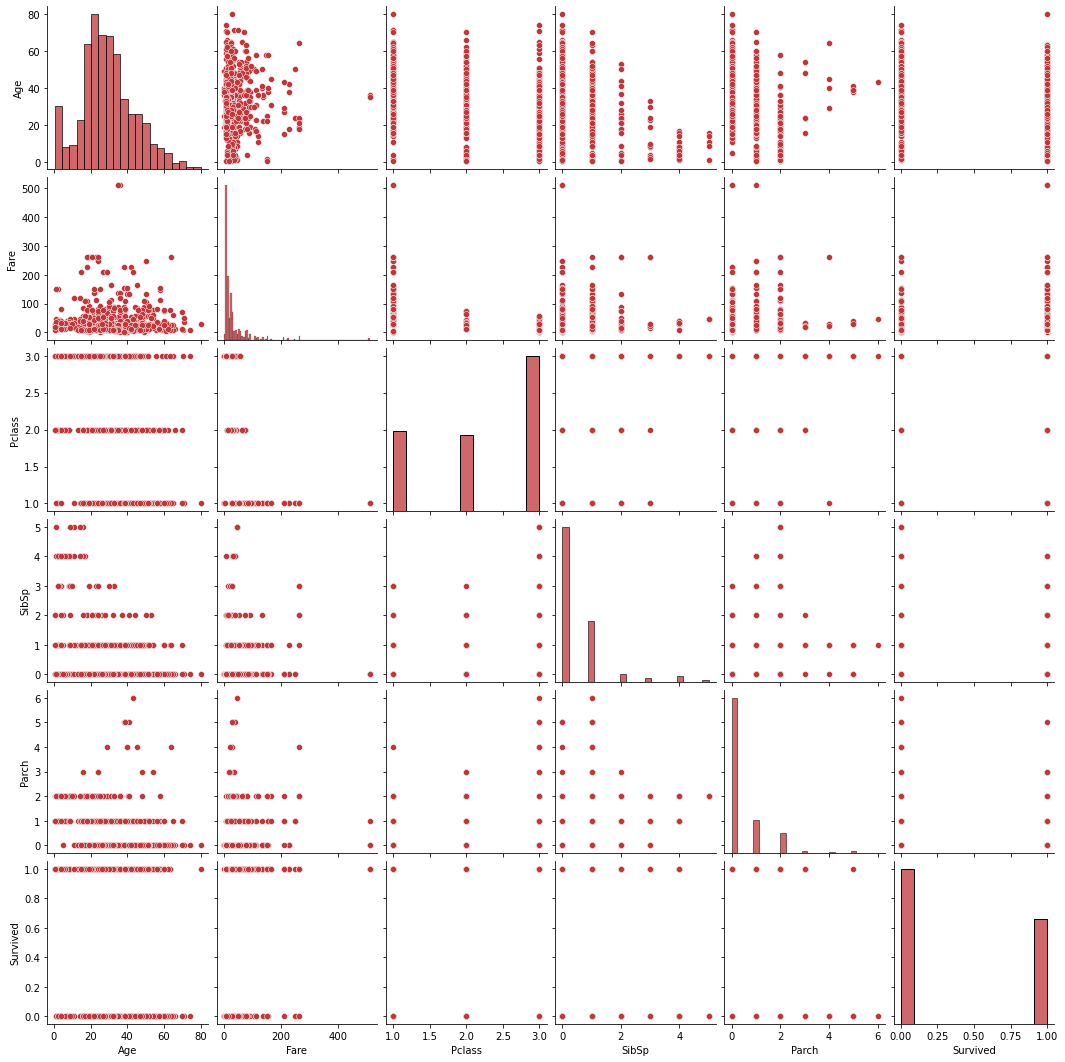

In [9]:
# Ваш код тут
sns.set_palette(sns.color_palette("RdBu"))
sns.pairplot(train_df[['Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch','Embarked','Survived']])

**Як плата за білет (`Fare`) залежить від класа каюти (`Pclass`)? Побудуйте boxplot.**

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

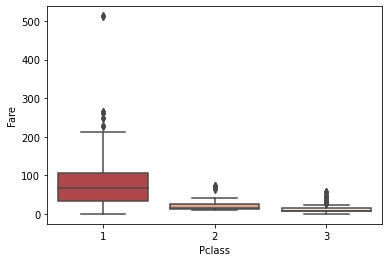

In [10]:
# Ваш код тут
sns.boxplot(x='Pclass', y='Fare', data=train_df)

**Такий boxplot виходить не дуже красивим через викиди.** 

**Опціонально: створіть признак `Fare_no_out` (вартості без викидів), в якому немає вартості, яка відрізняється від средньої по класу больш ніж на 2 стандартних відхилення. Важливо: потрібно виключати викиди саме в залежності від класа каюти. Інакше виключатися буде тільки самі больші (1 клас) і малі (3 класс) вартості.**

"\ntrain_df['Fare_no_out'] = fare_pclass1_no_out.extend(fare_pclass2_no_out)                                             .extend(fare_pclass3_no_out)\nsns.boxplot(x='Pclass', y='Fare_no_out', data=train_df)\n"

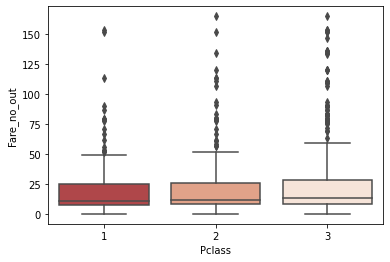

In [30]:
train_df['Fare_no_out'] = train_df['Fare']
fare_pclass1 = train_df[train_df['Pclass'] == 1]['Fare']
fare_pclass2 = train_df[train_df['Pclass'] == 2]['Fare']
fare_pclass3 = train_df[train_df['Pclass'] == 3]['Fare']
fare_pclass1_no_out = [i if i/fare_pclass1.mean() < 2 else 0 for i in fare_pclass1 ]
fare_pclass2_no_out = [i if i/fare_pclass2.mean() < 2 else 0 for i in fare_pclass2 ]
fare_pclass3_no_out = [i if i/fare_pclass3.mean() < 2 else 0 for i in fare_pclass3 ]
train_df['Fare_no_out'] = [*fare_pclass1_no_out,*fare_pclass2_no_out,*fare_pclass3_no_out]
sns.boxplot(x='Pclass', y='Fare_no_out', data=train_df)

**Яке співвідношення загинувших і виживших в залежності від статті? Зображіть з допомогою Seaborn.countplot з аргументом hue.**

<AxesSubplot:xlabel='Survived', ylabel='count'>

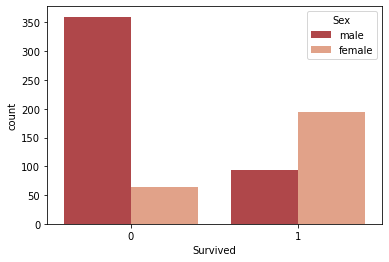

In [31]:
# Ваш код тут
sns.countplot(x='Survived', hue='Sex', data=train_df)

**Яке співвідношення загинувших і виживших в залежності від класа каюти? Зображіть з допомогою Seaborn.countplot з аргументом hue.**

<AxesSubplot:xlabel='Survived', ylabel='count'>

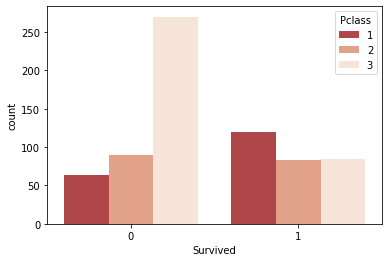

In [32]:
# Ваш код тут
sns.countplot(x='Survived', hue='Pclass', data=train_df)

**Як факт виживання залежить від віку пасажира? Перевірте (графічно) припущення, що молоді частіше виживали. Нехай, умовно, молоді - молодше 30 років, літні – старше 60 років.**

In [47]:
# Ваш код тут
def Age_category(age):
    return 'young' if age < 30\
            else 'elder' if age > 60 else 'middle age'
train_df['Age_category'] = train_df['Age'].apply(Age_category)
sns.countplot(x='Survived', hue='Age_category', data=train_df)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().